<a href="https://colab.research.google.com/github/ishandahal/feature_dimension_analysis/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Principal Component Analysis:
- Implementing with numpy
- Contrasting with SKLearn

In [ ]:
import pandas as pd

## Famous Iris dataset

In [ ]:
## Getting the dataset from the URL
df = pd.read_csv(filepath_or_buffer="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 header=None)

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
### Assigning column names
df.columns = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"]
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
### Separating features and labels
X = df.loc[:,'sepal_len':'petal_wid']
y = df.loc[:,'class']
X.shape, y.shape

((150, 4), (150,))

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()


###Standardize the data.
- Subtract the mean and divide by the standard deviation
- Using SKLearn to do that 

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [ ]:
## Constructing a covariance matrix
## Subtracting the feature mean 
## dot product with it's tranpose and divide by no of samples -1.
import numpy as np

mean_vec = X_std.mean(axis=0)
cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec) / (X_std.shape[0] - 1)
print(f"Covariance matrix\n{cov_mat}")

Covariance matrix
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
### Let's check to see if we get the same covariance matrix with numpy
numpy_covmat = np.cov(X_std.T)
print(f"Numpy Covariance Matrix\n {numpy_covmat}")

Numpy Covariance Matrix
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
### Calculating the Eigenvalues and Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(f"Eigenvalues\n{eig_vals}")
print()
print(f"Eigenvectors\n{eig_vecs}")

Eigenvalues
[2.93035378 0.92740362 0.14834223 0.02074601]

Eigenvectors
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [ ]:
### Calculating the Eigenvalues and Eigenvectors with correlation matrix
### Corelation Matrix is understood as the normalized covariance matrix
### Using Standardized covariance matrix should result in identical values 

cor_mat = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat)

print(f"Eigenvalues\n {eig_vals}")
print()
print(f"Eigenvectors\n{eig_vecs}")

Eigenvalues
 [2.91081808 0.92122093 0.14735328 0.02060771]

Eigenvectors
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [ ]:
### Let's double check this by using non-standardized data 

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print(f"Eigenvalues\n {eig_vals}")
print()
print(f"Eigenvectors\n {eig_vecs}")

Eigenvalues
 [2.91081808 0.92122093 0.14735328 0.02060771]

Eigenvectors
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [ ]:
## Using Singular Value Decomposition to find the vectors
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

###Now that we have seen multiple ways of calculating Eigen numbers 
### Let's sort them and pick the eigen vectors we want to use.
- First we will arrange the eigen vectors in descending order based on eigen values.
- Eigenvectors with lowest eigenvalues carry least amount of information about the distribution of the data 

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
eigen_pairs

[(2.9108180837520528,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9212209307072254,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1473532783050958,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235624842,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [ ]:
###Let's print the EigenValues.
print('Eigenvalues in descending order')
for i in eigen_pairs:
    print(f"{i[0]}")

Eigenvalues in descending order
2.9108180837520528
0.9212209307072254
0.1473532783050958
0.020607707235624842


In [ ]:
print(f"Eigenpairs")
for _ in eigen_pairs:
    print(f"{_}\n")

Eigenpairs
(2.9108180837520528, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))

(0.9212209307072254, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))

(0.1473532783050958, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))

(0.020607707235624842, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))



In [ ]:
## Variance explained
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
print('Percent Variance explained by each component')
for i in var_exp:
    print(round(i,2))

Percent Variance explained by each component
72.77
23.03
3.68
0.52


### We can see from the plot below that the first two 
### components explain significant amount (~96%) of 
### variance and the last two components could be dropped with minimal loss of information.

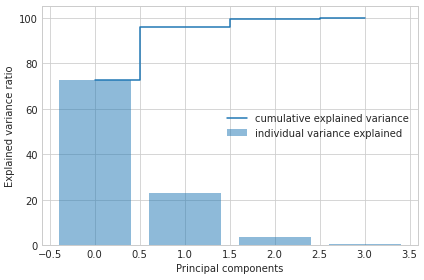

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual variance explained')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### Creating a projection matrix
- Concatenate the eigenvectors to create the projection matrix.
- Project the original 4 dimensional feature space to a 2 dimensional subspace by selecting the top 2 eigenvectors with the highest eigenvalues 


In [ ]:
# W is the projection matrix
W = np.hstack((eigen_pairs[0][1].reshape(4,1), 
               eigen_pairs[1][1].reshape(4,1)))

print(f"Projection matrix\n {W}")

Projection matrix
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
# Projecting the standardized 150X4 dimensional data with 4X2 dimensional 
# prejection matrix creating a 150X2 dimensional feature subspace 
Y = X_std.dot(W)
Y.shape

(150, 2)

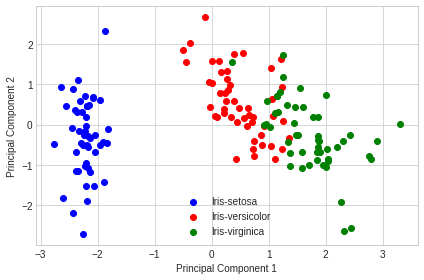

In [ ]:
## Let's plot and see what it looks like 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for label, color in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                            ('blue', 'red', 'green')):
        plt.scatter(Y[y==label, 0],
                    Y[y==label, 1],
                    label=label,
                    c=color)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

###Using SKLearn for PCA

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

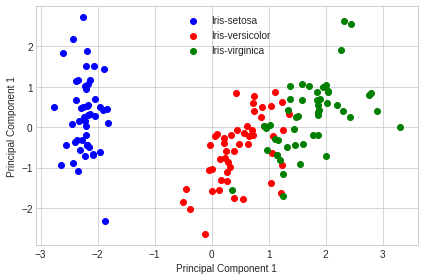

In [ ]:
### Plotting the result
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for label, color in zip(("Iris-setosa", 'Iris-versicolor', 'Iris-virginica'),
                            ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==label,0],
                    Y_sklearn[y==label,1],
                    label=label,
                    c=color)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 1')
    plt.legend(loc="upper center")
    plt.tight_layout()
    plt.show()